<a href="https://colab.research.google.com/github/hilvik/AI_Chat_Backend/blob/main/Jar_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv("/content/List_of_Orders_55FFC79CF8.csv")
order_details = pd.read_csv("/content/Order_Details_19795F61CF.csv")
sales_target = pd.read_csv("/content/Sales_target_DD2E9B96A0.csv")

print(orders.head())
print(order_details.head())
print(sales_target.head())


  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones
  Month of Order Date   Category   Target
0              Apr-18  Furniture  10400.0
1              May-18  Furniture  10500.0
2              Jun-18  Furniture  10600.0
3              Jul-18  Furniture  10800.0
4   

In [3]:
merged_data = pd.merge(orders, order_details, on="Order ID")

print(merged_data.head())


  Order ID  Order Date CustomerName        State       City  Amount  Profit  \
0  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad  1275.0 -1148.0   
1  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    66.0   -12.0   
2  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad     8.0    -2.0   
3  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    80.0   -56.0   
4  B-25602  01-04-2018        Pearl  Maharashtra       Pune   168.0  -111.0   

   Quantity     Category      Sub-Category  
0         7    Furniture         Bookcases  
1         5     Clothing             Stole  
2         3     Clothing       Hankerchief  
3         4  Electronics  Electronic Games  
4         2  Electronics            Phones  


In [4]:
category_sales = merged_data.groupby("Category")["Amount"].sum().reset_index()
print(category_sales)


      Category    Amount
0     Clothing  139054.0
1  Electronics  165267.0
2    Furniture  127181.0


In [5]:
merged_data["Profit Margin"] = (merged_data["Profit"] / merged_data["Amount"]) * 100

profit_analysis = merged_data.groupby("Category").agg(
    Total_Sales=("Amount", "sum"),
    Avg_Profit_Per_Order=("Profit", "mean"),
    Profit_Margin=("Profit Margin", "mean")
).reset_index()

print(profit_analysis)


      Category  Total_Sales  Avg_Profit_Per_Order  Profit_Margin
0     Clothing     139054.0             11.762908       4.132921
1  Electronics     165267.0             34.071429      -0.622928
2    Furniture     127181.0              9.456790      -6.788811


In [6]:
top_category = profit_analysis.sort_values(by="Total_Sales", ascending=False)
print(top_category)


      Category  Total_Sales  Avg_Profit_Per_Order  Profit_Margin
1  Electronics     165267.0             34.071429      -0.622928
0     Clothing     139054.0             11.762908       4.132921
2    Furniture     127181.0              9.456790      -6.788811


In [10]:
furniture_sales = sales_target[sales_target["Category"] == "Furniture"]

furniture_sales = furniture_sales.sort_values(by="Month of Order Date")

furniture_sales["Percentage Change"] = furniture_sales["Target"].pct_change() * 100

print(furniture_sales)


   Month of Order Date   Category   Target  Percentage Change
0               Apr-18  Furniture  10400.0                NaN
4               Aug-18  Furniture  10900.0           4.807692
8               Dec-18  Furniture  11400.0           4.587156
10              Feb-19  Furniture  11600.0           1.754386
9               Jan-19  Furniture  11500.0          -0.862069
3               Jul-18  Furniture  10800.0          -6.086957
2               Jun-18  Furniture  10600.0          -1.851852
11              Mar-19  Furniture  11800.0          11.320755
1               May-18  Furniture  10500.0         -11.016949
7               Nov-18  Furniture  11300.0           7.619048
6               Oct-18  Furniture  11100.0          -1.769912
5               Sep-18  Furniture  11000.0          -0.900901


In [11]:
state_order_count = orders["State"].value_counts().head(5).reset_index()
state_order_count.columns = ["State", "Order Count"]

print(state_order_count)


            State  Order Count
0  Madhya Pradesh          101
1     Maharashtra           90
2       Rajasthan           32
3         Gujarat           27
4          Punjab           25


In [12]:
state_sales = merged_data.groupby("State").agg(
    Total_Sales=("Amount", "sum"),
    Avg_Profit=("Profit", "mean")
).reset_index()

top_states_performance = state_sales[state_sales["State"].isin(state_order_count["State"])]

print(top_states_performance)


             State  Total_Sales  Avg_Profit
4          Gujarat      21058.0    5.344828
10  Madhya Pradesh     105140.0   16.326471
11     Maharashtra      95348.0   21.296552
13          Punjab      16786.0  -10.150000
14       Rajasthan      21149.0   16.986486


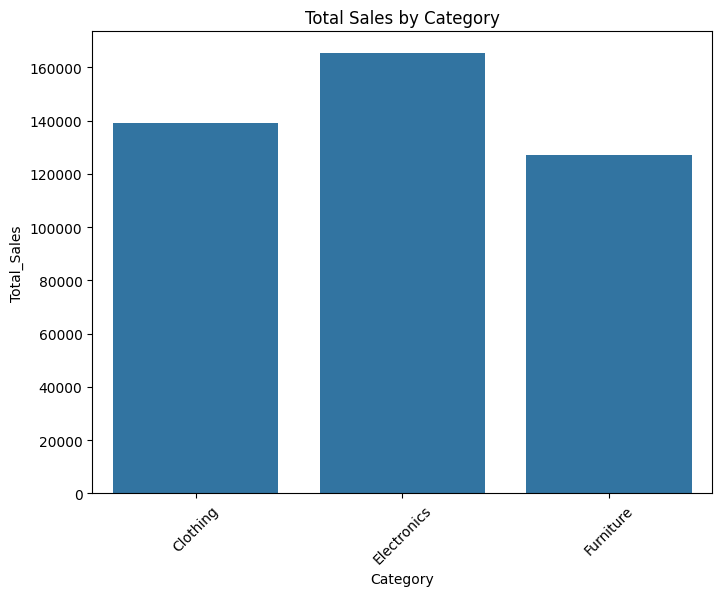

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Category", y="Total_Sales", data=profit_analysis)
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()


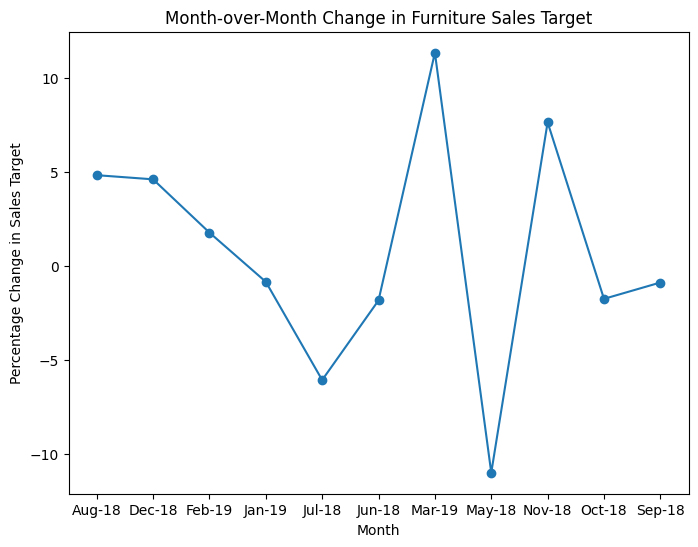

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(furniture_sales["Month of Order Date"], furniture_sales["Percentage Change"], marker="o")
plt.xlabel("Month")
plt.ylabel("Percentage Change in Sales Target")
plt.title("Month-over-Month Change in Furniture Sales Target")
plt.show()


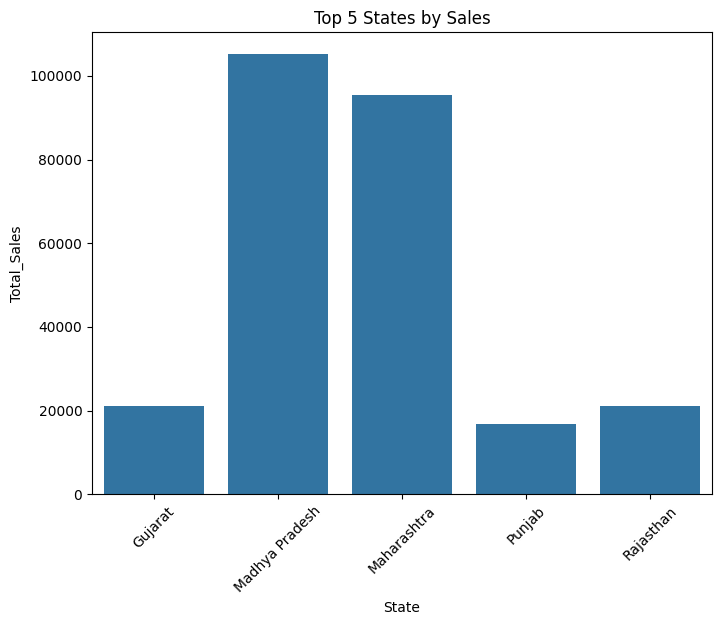

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x="State", y="Total_Sales", data=top_states_performance)
plt.title("Top 5 States by Sales")
plt.xticks(rotation=45)
plt.show()
